# Jets

Jets are bunches of ultrarelativistic particles carrying a colour charge and they are produced in heavy-ion collisions. These are studied i.e. in CERN. One collision is called one event. In each event an arbitrary number of jets (and other particles) can be produced.

In this project we consider a sample of data taken from CERN to analyze momenta and energies of jets. Because we deal with around 150 events, and in each event a number from 0 to 8 jets can be produced the problem is of statistical nature.

## Load libraries

In [1]:
import pandas as pd
import numpy as np

# Import "uproot" to uproot data written in root, as in CERN
import uproot

## Load data

In [2]:
# The file which we are using is taken from the CERN website "http://opendata.cern.ch/record/211".
# To understand physics behind the data one can use the tutorial provided at this website.

data = uproot.open("qcd.root")

## Check what the file contains

In [3]:
data.keys()

['events;1']

In [4]:
tree = data["events"]
#tree.keys()

Apart from data on jets, the file contains data on produced particles which do not carry a colour charge, but they carry electric charge or no charge. We focus only on jets, but other cases can be analysed in a similar way.

In [5]:
photons = tree.arrays(["Photon_Px","Photon_Py"])
#photons

In [6]:
eventWeight = tree.arrays(["EventWeight"])
#eventWeight

## Single event (one row)

In [7]:
jets = tree.arrays(["NJet","Jet_Px","Jet_Py","Jet_Pz","Jet_E"])

# Jets are represented by:

# N - number of jets produced in a single event. Note that N can be different in each event:
N = jets["NJet"][0]

# Momentum coordinates in x, y, z directions. Each variable represents a list of N produced jets:
Px = jets["Jet_Px"][0]
Py = jets["Jet_Py"][0]
Pz = jets["Jet_Pz"][0]

# Energy of jets:
E = jets["Jet_E"][0]

# Single event can be defined by a dictionary:
singleEvent = {"Jet_Px": Px, "Jet_Py": Py, "Jet_Pz": Pz, "Jet_E": E}

# Create a function to provide events in a list form and to round float numbers:
def singleEventList(**x): 
    for key, val in x.items():
        s = []
        val = val.tolist()
        val = np.round(val,2)
        s.append(val)
        x[key] = s
    return x

# Create a Data Frame for a single event:
singleEventFrame = pd.DataFrame(singleEventList(**singleEvent))
singleEventFrame

,Jet_Px,Jet_Py,Jet_Pz,Jet_E
0,"[-207.25, 129.87, 48.95, 28.59]","[92.15, -28.94, -18.83, -33.63]","[18.91, -182.83, 275.48, 9.37]","[229.07, 226.99, 280.72, 46.77]"


## All events

In [8]:
# Number of jets and four-momentum coordinates for all events:
nEvents = jets["NJet"]
xMom = jets["Jet_Px"]
yMom = jets["Jet_Py"]
zMom = jets["Jet_Pz"]
energy = jets["Jet_E"]

# Isolate the four-momentum from the number of jets, because each event for each component is an array, 
# and not just a number:
fourMomentum = {"JetPx":xMom, "JetPy":yMom, "JetPz":zMom, "JetE":energy}

### One column - Px component

In [19]:
# Define a function which creates a list of Px component for all events, 
# where each event is also represented by a list:
xCol = []
for i in xMom:
    if len(i)>0:
        vals = {}
        i = i.tolist()
        i = np.round(i,2)
        vals["Px"] = i
        xCol.append(vals)

#xCol

### All columns

In [10]:
#pd.set_option("display.max_rows", None)

# Define a function to create a DataFrame for all events
def jetsAllEvents(**x):
    result = pd.DataFrame()
    for key in x.keys():
        col = []
        name = str(key)
        for value in x[key]:
            value = value.tolist()
            value = np.round(value,2)
            col.append(value)
        result[name] = col
    return result

jetsAllFourMomenta = jetsAllEvents(**fourMomentum)

# Add a column with number of jets:
jetsAllFourMomenta.insert(loc=0, column="NJet", value=nEvents)

# Delete empty events and clean:
jetsAllFourMomenta.drop(axis="rows", labels=[28,51,61,95,97], inplace=True)

jetsAllFourMomenta.reset_index(inplace=True)
del jetsAllFourMomenta["index"]
jetsAllFourMomenta


,NJet,JetPx,JetPy,JetPz,JetE
0,4,"[-207.25, 129.87, 48.95, 28.59]","[92.15, -28.94, -18.83, -33.63]","[18.91, -182.83, 275.48, 9.37]","[229.07, 226.99, 280.72, 46.77]"
1,4,"[-138.04, 126.42, 30.45, -19.39]","[-40.1, 32.83, 31.06, -23.21]","[9.22, 48.83, -74.05, 37.53]","[145.06, 139.59, 86.09, 48.55]"
2,1,[1.48],[35.45],[159.65],[163.68]
3,2,"[53.27, -46.61]","[-34.74, 18.75]","[-364.0, 49.85]","[369.77, 71.07]"
4,2,"[531.53, -503.55]","[1652.4, -1532.58]","[-1289.7, 799.83]","[2163.85, 1802.55]"
...,...,...,...,...,...
132,5,"[-264.35, 126.11, 98.11, -0.05, 21.43]","[36.02, 5.44, -10.87, -48.51, 32.15]","[34.93, 324.29, -53.3, 31.2, 79.71]","[270.68, 348.63, 112.88, 58.03, 88.87]"
133,1,[-11.32],[-77.07],[372.57],[380.84]
134,5,"[-103.43, 100.06, 24.93, 10.93, -10.29]","[561.3, -370.4, -120.43, -39.43, -28.19]","[-551.99, -289.18, 4.78, -82.94, -11.91]","[795.92, 483.51, 123.73, 93.12, 32.72]"
135,1,[4.97],[77.29],[53.56],[94.85]


In [11]:
jetsEnergy = jetsAllFourMomenta[["NJet", "JetE"]].copy()
jetsEnergy


,NJet,JetE
0,4,"[229.07, 226.99, 280.72, 46.77]"
1,4,"[145.06, 139.59, 86.09, 48.55]"
2,1,[163.68]
3,2,"[369.77, 71.07]"
4,2,"[2163.85, 1802.55]"
...,...,...
132,5,"[270.68, 348.63, 112.88, 58.03, 88.87]"
133,1,[380.84]
134,5,"[795.92, 483.51, 123.73, 93.12, 32.72]"
135,1,[94.85]


In [12]:
energyList = jetsEnergy["JetE"].tolist()
energyList

# Define a function to calculate the mean of energy of each event and round the numbers:
g = []
def energyAvgFunk(*x):
    for i in x:
        k = np.mean(i)
        k = k.round(2)
        g.append(k)
    return g

# Call the function:
energyAvg = energyAvgFunk(*energyList)
    
# Create a Series of energy averages:
energyAvgSeries = pd.Series(energyAvg)

# Add a column:
jetsEnergy["AvgE"] = energyAvgSeries

# Prepare statistics for the number of jets produced in each event:
jetsEnergy = jetsEnergy.sort_values(by=["NJet"]).dropna()
jetsEnergyCounts = jetsEnergy["NJet"].value_counts().sort_index()

# Get index and values of the series:
jetsEnergyCounts.index
jetsEnergyCounts.values



array([14, 59, 36, 13, 11,  2,  1,  1])

## Frequency of number of produced jets occurence

<AxesSubplot:>

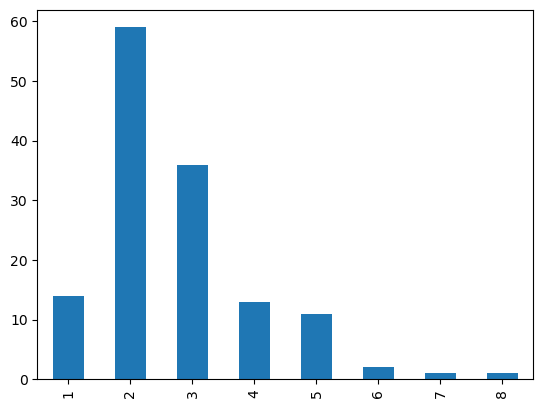

In [13]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# Frequency of N occurence:
jetsEnergyCounts.plot(kind="bar")

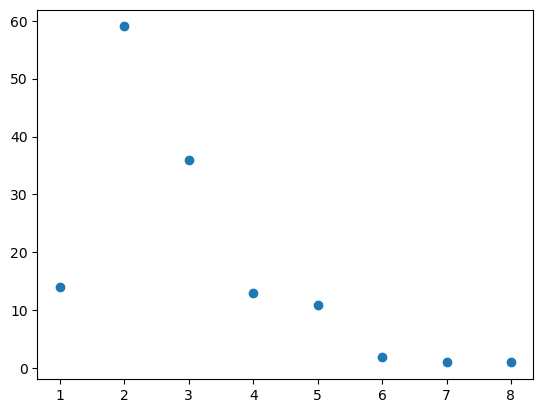

In [14]:
x = jetsEnergyCounts.index
y = jetsEnergyCounts.values

plt.scatter(x, y)

## Distribution of average jets energy

<AxesSubplot:xlabel='NJet', ylabel='AvgE'>

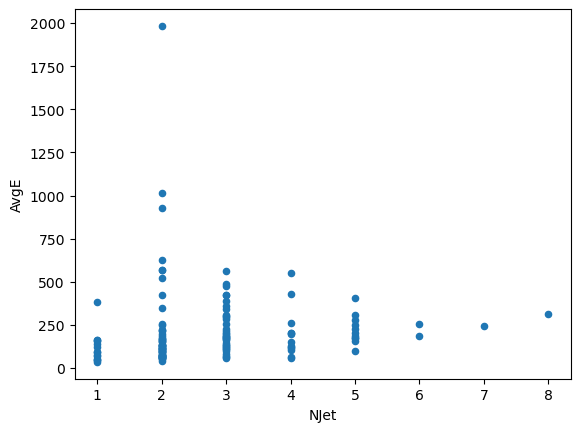

In [15]:
# Average energy distribution as a function of the number of jets produced:

jetsEnergy.plot(kind="scatter", x="NJet", y="AvgE")

<AxesSubplot:title={'center':'Average Energy'}, xlabel='NJet', ylabel='AvgE'>

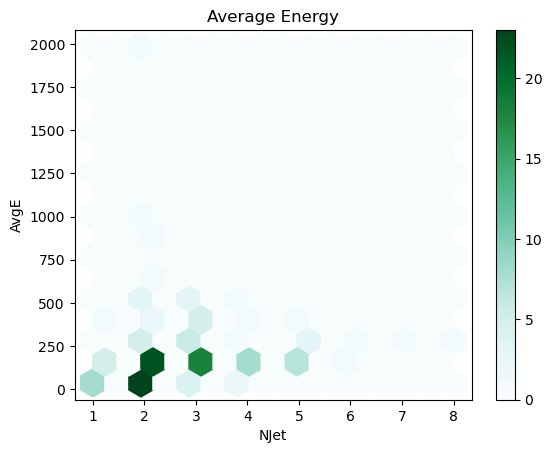

In [16]:
# Average energy density:

jetsEnergy.plot.hexbin(x="NJet", y="AvgE", gridsize=15, title="Average Energy")

## Maximal and minimal energy of each event

In [17]:
import matplotlib.pyplot as plt

energyMaxMin = jetsEnergy.copy()

# Add a column with the number of jets:
valueNJet = energyMaxMin["NJet"]

# Clean (max and min energy are calculated only from the lists where there are at least 2 elements):
energyMaxMin = energyMaxMin.where(valueNJet>1).dropna()
energyMaxMin.reset_index(inplace=True)

del energyMaxMin["index"]

energyMxMnList = energyMaxMin["JetE"].tolist()

# Define a function to calculate the mean of energy of each event and rounds the numbers:
energyMax = []
energyMin = []

def energyMxMnFunk(*x):
    for i in x:
        mx = max(i)
        mn = min(i)
        mx = mx.round(2)
        mn = mn.round(2)
        energyMax.append(mx)
        energyMin.append(mn)
    return energyMax, energyMin

# Call the function:
energyMxMn = energyMxMnFunk(*energyMxMnList)

# Collect information about energy aggregations in a DataFrame:
energyMxMnFrame = pd.DataFrame(energyMxMn)
energyMxMnFrame = energyMxMnFrame.transpose()
energyMxMnFrame.rename(columns = {0:"MaxE", 1:"MinE"}, inplace=True)
energyMxMnFrame
energyMxMnFrame["DiffE"] = energyMxMnFrame["MaxE"] - energyMxMnFrame["MinE"]

# Combine old DataFrame on energy with new columns:
energyStatsFrame = energyMaxMin.join(energyMxMnFrame)
energyStatsFrame = energyStatsFrame.sort_values(by = ["NJet"])

energyStatsFrame

,NJet,JetE,AvgE,MaxE,MinE,DiffE
0,2.0,"[80.48, 115.8]",98.14,115.80,80.48,35.32
32,2.0,"[351.52, 144.9]",248.21,351.52,144.90,206.62
33,2.0,"[330.11, 175.61]",252.86,330.11,175.61,154.50
34,2.0,"[215.39, 48.76]",132.07,215.39,48.76,166.63
35,2.0,"[38.13, 188.89]",113.51,188.89,38.13,150.76
...,...,...,...,...,...,...
113,5.0,"[234.14, 110.16, 67.21, 59.86, 31.69]",100.61,234.14,31.69,202.45
119,6.0,"[779.29, 388.39, 204.37, 43.81, 50.6, 53.12]",253.26,779.29,43.81,735.48
120,6.0,"[311.01, 235.68, 283.09, 157.32, 63.25, 68.02]",186.40,311.01,63.25,247.76
121,7.0,"[484.74, 590.41, 285.23, 185.33, 90.62, 50.86,...",245.80,590.41,33.40,557.01


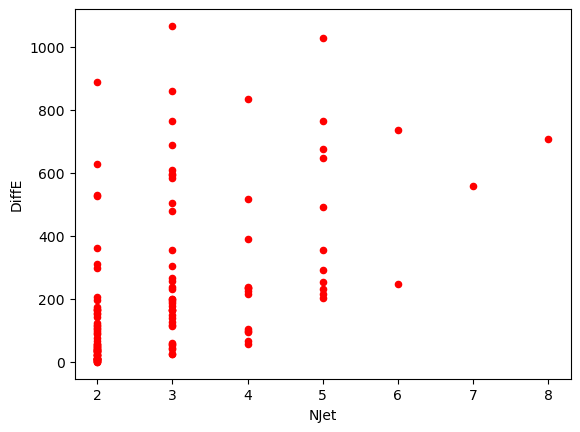

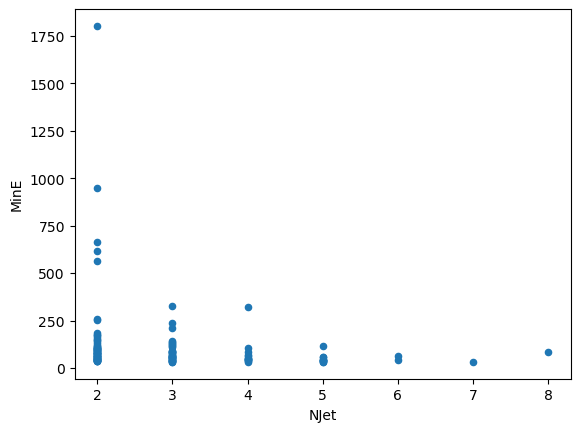

In [18]:
energyStatsFrame.plot(kind="scatter", x="NJet", y="DiffE", color="red")
energyStatsFrame.plot(kind="scatter", x="NJet", y="MinE")
plt.show()